In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/PPW/tugas

/content/drive/MyDrive/PPW/tugas


In [4]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [5]:
# Mengimpor modul yang diperlukan
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Path ke file di Google Drive (ubah sesuai lokasimu)
file_path = '/content/drive/MyDrive/PPW/tugas/Tugas-Crawling-Data-Berita-2-kategori.csv'

# Baca file CSV
df = pd.read_csv(file_path)

In [7]:
text = df['Isi Berita'][0]

# Ekstraksi kalimat
sentences = sent_tokenize(text)

# Membuat DataFrame dari kalimat
df_sentences = pd.DataFrame(sentences, columns=["Kalimat"])
df_sentences

,Kalimat
0,"TIMESINDONESIA, JAKARTA – Di bawah kepemimpina..."
1,Hal itu dengan fokus pada kemandirian pangan d...
2,Prabowo diharapkan mampu membawa Indonesia men...
3,ketika dimintai pendapatnya terkait prospek pe...
4,Setelah dilantik sebagai Presiden Republik Ind...
5,"""Setelah 20 Oktober, Prabowo akan menjadi ""med..."
6,Namanya akan harum dan popularitasnya mengalam...
7,Membangun Demokrasi yang Sehat\nMuhlis menilai...
8,"Diberbagai kesempatan, Prabowo menegaskan pent..."
9,Dia mengapresiasi ungkapan Prabowo yang menyeb...


In [16]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mendapatkan daftar stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_sentence(sentence):
    sentence_cleaned = re.sub(r'[^a-zA-Z\s.]', ' ', sentence)  # Hanya biarkan alfabet dan titik
    sentence_cleaned = sentence_cleaned.lower()  # Ubah ke huruf kecil

    # Tokenisasi
    words = word_tokenize(sentence_cleaned)  # Memecah teks menjadi kata-kata

    # Stemming setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menghapus stopwords
    words_without_stopwords = [word for word in stemmed_words if word not in stop_words]

    return words_without_stopwords

# Preprocessing kalimat menjadi daftar kata
preprocessed_words = [word for sentence in sentences for word in preprocess_sentence(sentence)]

# Membuat DataFrame dari kata-kata yang sudah dipreproses
df_preprocessed = pd.DataFrame(preprocessed_words, columns=["kata_clean"])

In [17]:
df_preprocessed

,kata_clean
0,timesindonesia
1,jakarta
2,pimpin
3,presiden
4,ri
...,...
602,klik
603,link
604,lupa
605,follow


In [19]:
# Membuat vectorizer TF-IDF
vectorizer = TfidfVectorizer()

# Mengonversi kata yang sudah dipreproses menjadi string untuk keperluan TF-IDF
preprocessed_text = [' '.join(preprocessed_words)]

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(preprocessed_text)

# Mendapatkan daftar kata fitur
feature_names = vectorizer.get_feature_names_out()

# Mengonversi TF-IDF matrix ke DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names, columns=["tfidf"])
df_tfidf = df_tfidf.sort_values(by=["tfidf"], ascending=False)

df_tfidf

,tfidf
prabowo,0.562059
muhlis,0.344488
indonesia,0.344488
perintah,0.217571
demokrasi,0.217571
...,...
kasih,0.018131
kejar,0.018131
kelompok,0.018131
kerap,0.018131


In [21]:
# Menghitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix.T)

# Mengonversi hasil cosine similarity menjadi DataFrame
df_cosine_sim = pd.DataFrame(cosine_sim, index=feature_names, columns=feature_names)
df_cosine_sim

,acara,acu,adil,adu,advertisement,agenda,ajak,akses,aktif,akuntabel,...,umkm,unggul,uni,upaya,usaha,utama,visi,waris,wibawa,wujud
acara,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
acu,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adil,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adu,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
advertisement,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utama,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
visi,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
waris,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
wibawa,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
# Threshold untuk adjacency matrix
threshold = 0.2

# Membentuk adjacency matrix berdasarkan threshold
adjacency_matrix = (cosine_sim >= threshold).astype(int)

# Mengisi diagonal dengan 0 agar tidak ada self-loop
np.fill_diagonal(adjacency_matrix, 0)

# Konversi adjacency matrix ke DataFrame
df_adjacency = pd.DataFrame(adjacency_matrix, index=feature_names, columns=feature_names)
df_adjacency

,acara,acu,adil,adu,advertisement,agenda,ajak,akses,aktif,akuntabel,...,umkm,unggul,uni,upaya,usaha,utama,visi,waris,wibawa,wujud
acara,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
acu,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
adil,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
adu,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
advertisement,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utama,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
visi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
waris,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
wibawa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


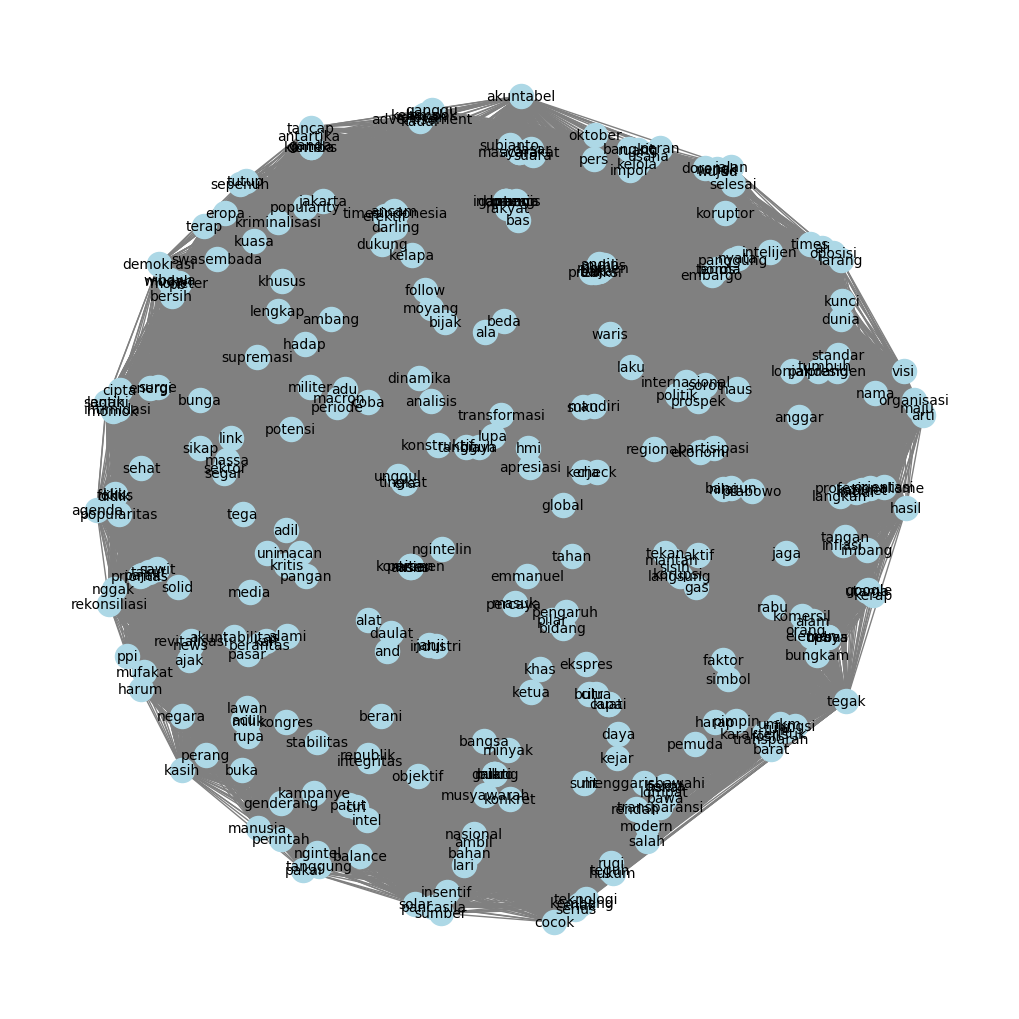

In [26]:
# Membuat graph dari adjacency matrix
G = nx.from_pandas_adjacency(df_adjacency)

# Plot graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_size=10, node_color='lightblue', edge_color='gray')
plt.show()